# Redes Neurais Artificiais – Atividade Avaliativa 2.1

### Aprendizado Supervisionado no Neurônio Perceptron

#### 2.1. Parte I – Resolvendo um Problema Linearmente Separável

In [1]:
# import os
# from os.path import expanduser

# os.chdir(expanduser("~"))

In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

Função de ativação Degrau com limiar = 0 / Taxa de aprendizado = 0.1 / Pesos = [-0.5:0.5] 

Executar o algoritmo até a convergencia

In [3]:
data_np = np.fromfile('data/dataAll.txt')

In [4]:
N = 3

In [5]:
data = np.ndarray((int(len(data_np)/N),N), buffer=data_np)

In [6]:
data.shape

(1000, 3)

In [7]:
data

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

In [8]:
X = data[:,:N-1]
X[:5]

array([[-363.7884,  244.1423],
       [ 328.7572, -256.7658],
       [-164.9827,  613.2164],
       [ 536.5905,  764.9575],
       [ 314.2297,  343.8375]])

In [9]:
yd = data[:,N-1]
yd[:5]

array([0., 1., 0., 0., 0.])

In [10]:
w_ = np.random.uniform(-0.5,0.5,X.shape[1] + 1)
w_

array([-0.39316916, -0.35011017, -0.43219296])

In [11]:
x0 = -1

In [12]:
entradas = np.insert(X, 0, x0, axis=1)
entradas

array([[  -1.    , -363.7884,  244.1423],
       [  -1.    ,  328.7572, -256.7658],
       [  -1.    , -164.9827,  613.2164],
       ...,
       [  -1.    ,  872.4311,  669.1192],
       [  -1.    ,  822.6894, -702.6489],
       [  -1.    , -140.147 ,  734.0983]])

In [13]:
np.dot(w_, entradas[0])

22.24260630321002

In [14]:
yd[0] - 1

-1.0

In [15]:
#! curl -o dataAll.txt "https://docs.google.com/uc?export=download&id=1HrlvFXy4xJhaS2KfAt3CI7HRBjl6g1dk"
#! wget "https://docs.google.com/uc?export=download&id=1HrlvFXy4xJhaS2KfAt3CI7HRBjl6g1dk"

In [16]:
def degrau_gen(theta = 0):
  def f(u):
    return np.where(u >= theta, 1, 0)
  return f

In [17]:
# exemplo de funcionamento
limiar = 0
degrau = degrau_gen(limiar)
print(degrau(-7), degrau(3))

0 1


In [18]:
class Perceptron(object):
    """Classificador Perceptron
    """
    def __init__(self, ativacao = degrau_gen(), apz=0.1, ini_intervalo = -0.5, fim_intervalo = 0.5):
        self.ativacao = ativacao
        self.apz = apz
        self.ini_intervalo = ini_intervalo
        self.fim_intervalo = fim_intervalo
        self.x0 = -1

    def fit(self, X, yd):
        entradas = np.insert(X, 0, x0, axis=1)

        self.w_ = np.random.uniform(self.ini_intervalo, self.fim_intervalo, entradas.shape[1])
        print('Pesos iniciais:', self.w_)
        epcs = 0
        ajustes = 0

        while True:
            ajustes_peso_epoca = 0

            for xi, target in zip(entradas, yd):
                y = self.predict(xi)
                erro_ = target - y

                if erro_ != 0:
                    delta = self.apz * erro_ * xi
                    self.w_ += delta

                    ajustes_peso_epoca += 1
                    print("Pesos ajustados:", self.w_)
            epcs+=1
            print(f"Ajustes em época {epcs}: {ajustes_peso_epoca}")
            if not ajustes_peso_epoca:
                break
            else:
                ajustes += ajustes_peso_epoca

        print("O número total de ajustes no vetor de pesos:", ajustes)
        print("O número de épocas até a convergência:", epcs)
        # print('Ultimos pesos: ', self.w_)
        self.epocas = epcs
        self.ajustes = ajustes
        return self

    def u(self, X):
        """Cálculo da entrada da rede antes da ativação"""
        return np.dot(X, self.w_)

    def predict(self, X):
        return self.ativacao(self.u(X))

In [19]:
rede = Perceptron()

In [20]:
rede_ajustada = rede.fit(X, yd)

Pesos iniciais: [ 0.33369479 -0.29841778  0.02248942]
Pesos ajustados: [  0.43369479  36.08042222 -24.39174058]
Pesos ajustados: [   0.53369479  -17.57862778 -100.88749058]
Pesos ajustados: [  0.43369479  55.21739222 -65.05793058]
Pesos ajustados: [  0.33369479 137.81609222  14.79789942]
Pesos ajustados: [  0.43369479 143.66185222 -63.49669058]
Pesos ajustados: [   0.53369479  103.65294222 -141.38938058]
Pesos ajustados: [  0.63369479 157.32275222 -92.29711058]
Pesos ajustados: [   0.53369479  104.36269222 -149.16657058]
Pesos ajustados: [  0.63369479 163.92221222 -99.04424058]
Pesos ajustados: [   0.53369479  118.39758222 -164.68017058]
Pesos ajustados: [  0.63369479 209.11344222 -89.96685058]
Pesos ajustados: [   0.53369479  151.33245222 -150.27500058]
Pesos ajustados: [   0.43369479  103.06589222 -198.74472058]
Pesos ajustados: [   0.33369479  173.51324222 -156.62845058]
Pesos ajustados: [   0.23369479  126.67124222 -208.03832058]
Pesos ajustados: [ 1.33694794e-01  1.96534872e+02 -1

[Calculate the Decision Boundary of a Single Perceptron - Visualizing Linear Separability](https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38)

* Ax + By - C = 0

* w1x + w2y + b

* w1 * x1 + w2 * x2 + b

* x-intercept: 
x = -(b - w2y) / w1

if y == 0

x = -(b - w2 * 0) / w1

x = -b / w1

* y-intercept: 
y = -(b - w1x) / w2

if x == 0

y = -(b - w1 * 0) / w2

y = -b / w2

* point_1 = (0, -b / w2) 

* point_2 = (-b / w1, 0)

* m = (y2 - y1) / (x2 - x1)

m = (0 - -(b / w2)) / (-(b / w1) - 0)

* m = -(b / w2) / (b / w1)

* y = m.x + y0

y = (-(b / w2) / (b / w1))x + (-b / w2)

b = w0 * x0 = -w0

**y = (-w1/w2)x + w0/w2**


In [21]:
x_reta = np.linspace(np.amin(X[:,:1]),np.amax(X[:,:1]))
x_reta

array([-999.9963    , -959.2445898 , -918.49287959, -877.74116939,
       -836.98945918, -796.23774898, -755.48603878, -714.73432857,
       -673.98261837, -633.23090816, -592.47919796, -551.72748776,
       -510.97577755, -470.22406735, -429.47235714, -388.72064694,
       -347.96893673, -307.21722653, -266.46551633, -225.71380612,
       -184.96209592, -144.21038571, -103.45867551,  -62.70696531,
        -21.9552551 ,   18.7964551 ,   59.54816531,  100.29987551,
        141.05158571,  181.80329592,  222.55500612,  263.30671633,
        304.05842653,  344.81013673,  385.56184694,  426.31355714,
        467.06526735,  507.81697755,  548.56868776,  589.32039796,
        630.07210816,  670.82381837,  711.57552857,  752.32723878,
        793.07894898,  833.83065918,  874.58236939,  915.33407959,
        956.0857898 ,  996.8375    ])

In [22]:
w0, w1, w2 = rede_ajustada.w_

In [23]:
print(w0, w1, w2)

-0.0663052060529068 218.50412221982293 -217.70976058126385


In [24]:
y_reta = -w1/w2 * x_reta + w0/w2
y_reta

array([-1003.64470048,  -962.74429875,  -921.84389703,  -880.9434953 ,
        -840.04309358,  -799.14269185,  -758.24229013,  -717.34188841,
        -676.44148668,  -635.54108496,  -594.64068323,  -553.74028151,
        -512.83987978,  -471.93947806,  -431.03907633,  -390.13867461,
        -349.23827289,  -308.33787116,  -267.43746944,  -226.53706771,
        -185.63666599,  -144.73626426,  -103.83586254,   -62.93546081,
         -22.03505909,    18.86534263,    59.76574436,   100.66614608,
         141.56654781,   182.46694953,   223.36735126,   264.26775298,
         305.1681547 ,   346.06855643,   386.96895815,   427.86935988,
         468.7697616 ,   509.67016333,   550.57056505,   591.47096678,
         632.3713685 ,   673.27177022,   714.17217195,   755.07257367,
         795.9729754 ,   836.87337712,   877.77377885,   918.67418057,
         959.5745823 ,  1000.47498402])

In [25]:
data_plot = pd.DataFrame(data, columns = ['x1', 'x2', 'y'])

In [26]:
classe_0 = data_plot.loc[data_plot['y'] == 0]
classe_1 = data_plot.loc[data_plot['y'] == 1]

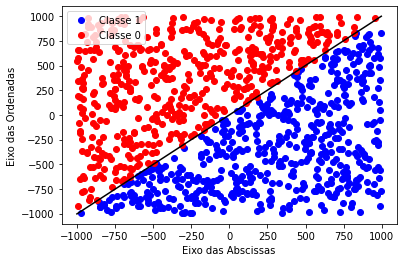

In [27]:
plt.plot(classe_1.x1, classe_1.x2, 'bo', label='Classe 1')
plt.plot(classe_0.x1, classe_0.x2, 'ro', label='Classe 0')

plt.plot(x_reta, y_reta, 'black')

plt.xlabel('Eixo das Abscissas')
plt.ylabel('Eixo das Ordenadas')
plt.legend(loc='upper left')
plt.show()

#### 2.2. Parte II – Experimentação

In [28]:
apzs = [0.4, 0.1, 0.01]
lmt = [(-100,100), (-0.5,0.5)]
N = 10

In [29]:
data_list = list()
for ini, fim in lmt:
  for apz in apzs:
    rede = Perceptron(apz=apz, ini_intervalo=ini, fim_intervalo=fim)
    for i in range(1,N+1):
      rede_ajustada = rede.fit(X, yd)
      data_list.append((apz, str(ini)+','+str(fim), rede_ajustada.ajustes, rede_ajustada.epocas))

A saída de streaming foi truncada nas últimas 5000 linhas.
Pesos ajustados: [ 61.77924898  82.31028943 -82.47938223]
Pesos ajustados: [ 61.76924898  90.59947643 -74.20123323]
Pesos ajustados: [ 61.75924898  87.61107043 -77.51216623]
Pesos ajustados: [ 61.76924898  81.25746043 -84.67249323]
Pesos ajustados: [ 61.77924898  84.38814843 -81.60966123]
Pesos ajustados: [ 61.78924898  76.83275843 -89.34195623]
Pesos ajustados: [ 61.79924898  83.73034743 -82.86286323]
Pesos ajustados: [ 61.78924898  83.24959743 -83.35149723]
Ajustes em época 21: 15
Pesos ajustados: [ 61.77924898  91.53878443 -75.07334823]
Pesos ajustados: [ 61.76924898  88.55037843 -78.38428123]
Pesos ajustados: [ 61.77924898  82.19676843 -85.54460823]
Pesos ajustados: [ 61.78924898  85.32745643 -82.48177623]
Pesos ajustados: [ 61.79924898  77.77206643 -90.21407123]
Pesos ajustados: [ 61.80924898  84.66965543 -83.73497823]
Pesos ajustados: [ 61.79924898  84.18890543 -84.22361223]
Ajustes em época 22: 7
Ajustes em época 23: 0
O

In [30]:
data = pd.DataFrame(data_list, columns=['apz','intervalo','ajustes','epocas'])

In [31]:
gb = data.groupby(['apz','intervalo'])
gb.agg(['mean','std','min'])

ajustes                  epocas               
                  mean         std  min   mean        std min
apz  intervalo                                               
0.01 -0.5,0.5    132.1   92.857657   12   11.3   8.433399   2
     -100,100    310.5  253.577185  117   23.8  26.148295   7
0.10 -0.5,0.5    113.3   82.503939   13    7.7   5.926400   2
     -100,100    145.0   72.845346   24   12.6   9.227977   2
0.40 -0.5,0.5     65.4   52.542470   12    4.2   2.573368   2
     -100,100    140.6   82.116719   11   10.7   7.242621   2

#### 2.3. Parte III – Validação Holdout em Problema Não-Linearmente Separável